<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-1-71225e3ad40e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


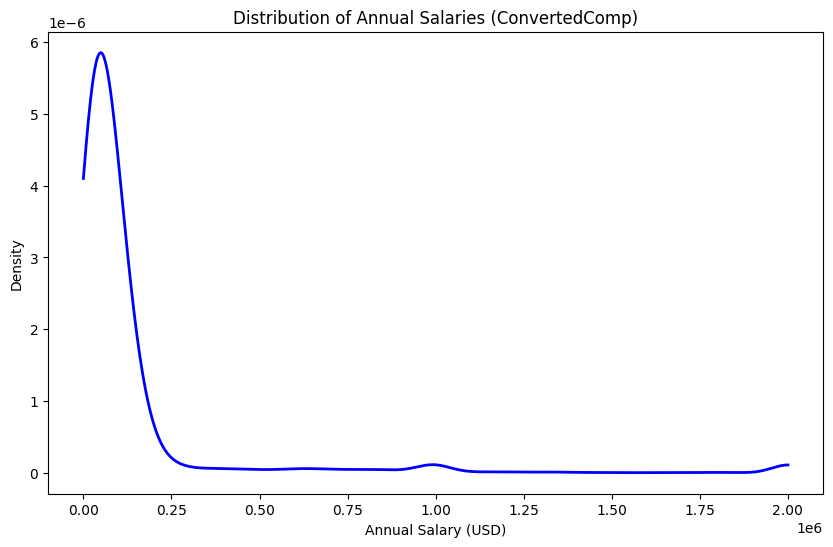

In [18]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Create the plot
plt.figure(figsize=(10, 6))

# Get the data and remove NaN values
data = df['ConvertedComp'].dropna()

# Calculate the kernel density estimation to get the bell curve
kde = stats.gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 1000)
y_range = kde(x_range)

# Plot the distribution curve
plt.plot(x_range, y_range, 'b-', linewidth=2)

# Set labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.title('Distribution of Annual Salaries (ConvertedComp)')

# Show the plot
plt.show()



Plot the histogram for the column `ConvertedComp`.


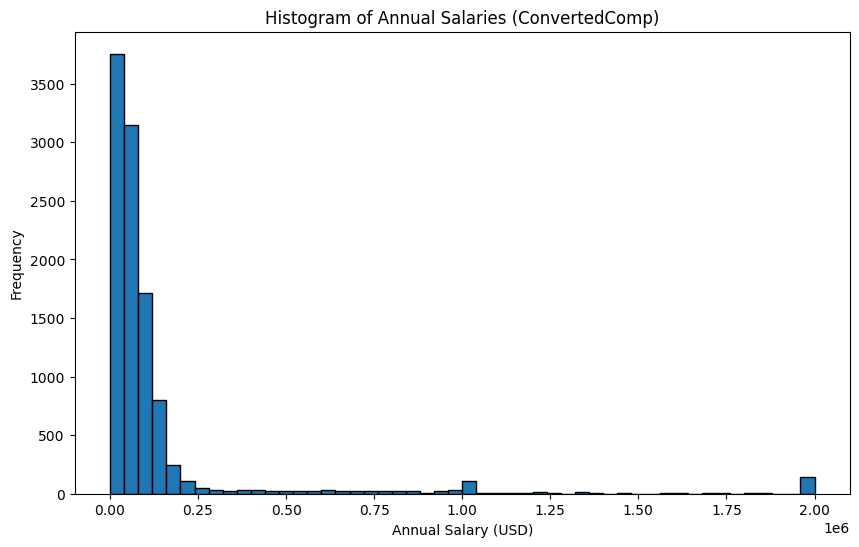

In [19]:
# your code goes here
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histogram for ConvertedComp
plt.hist(df['ConvertedComp'].dropna(), bins=50, edgecolor='black')

# Set labels and title
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Salaries (ConvertedComp)')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [20]:
# your code goes here
# Calculate the median of ConvertedComp
median_salary = df['ConvertedComp'].median()
print(f"The median of the ConvertedComp column is: ${median_salary:.2f}")

The median of the ConvertedComp column is: $57745.00


How many responders identified themselves only as a **Man**?


In [21]:
# your code goes here
men_count = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders who identified only as a Man: {men_count}")

Number of responders who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
# your code goes here
women_median_salary = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Those who identified as women in ConvertedComp column, the median is: ${women_median_salary:.2f}")

Those who identified as women in ConvertedComp column, the median is: $57708.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
# Calculate the five-number summary
summary = df['Age'].describe()

# Extract the required values
minimum = summary['min']
q1 = summary['25%']
median = summary['50%']
q3 = summary['75%']
maximum = summary['max']

# Print the five-number summary
print("Five-Number Summary for the Age column:")
print(f"Minimum: {minimum}")
print(f"First Quartile: {q1}")
print(f"Median (50th percentile): {median}")
print(f"Third Quartile: {q3}")
print(f"Maximum: {maximum}")

Five-Number Summary for the Age column:
Minimum: 16.0
First Quartile: 25.0
Median (50th percentile): 29.0
Third Quartile: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


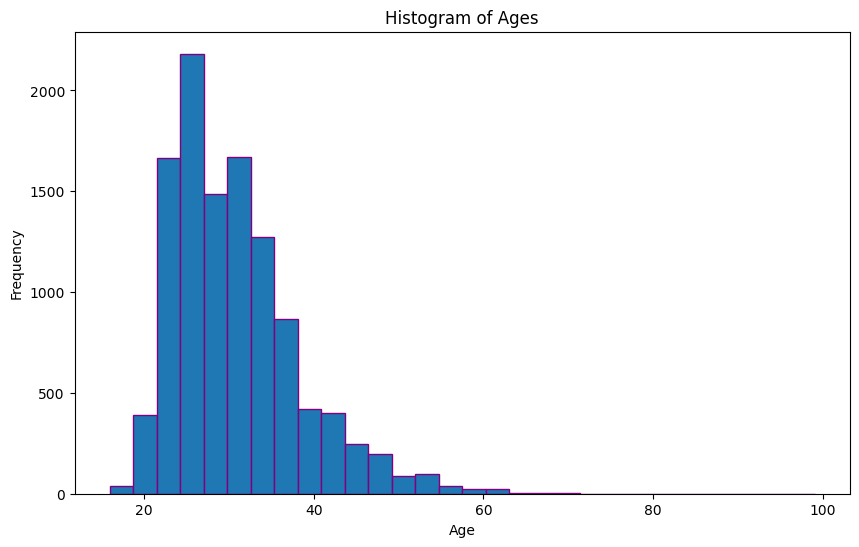

In [31]:
# your code goes here
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='purple')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


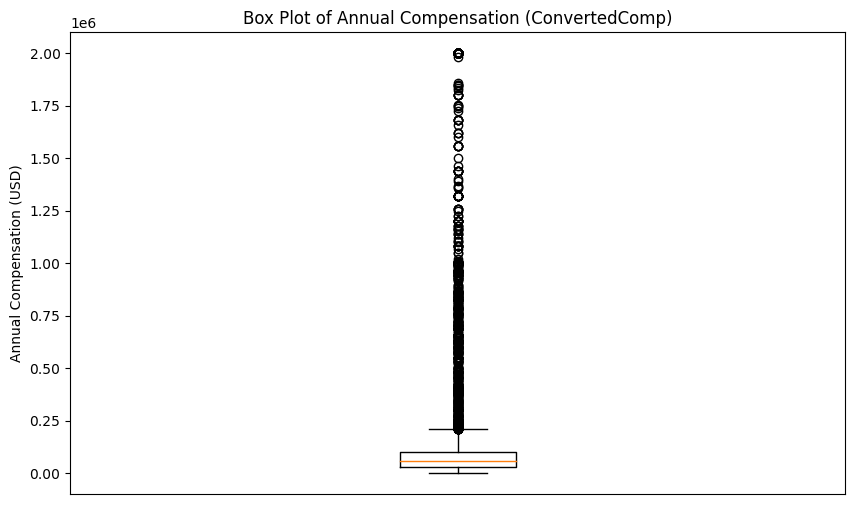

Lower bound for non-outliers: $-82830.00
Upper bound for non-outliers: $209698.00
Number of outliers: 879


In [34]:
# your code goes here
# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), whis=1.5)

plt.ylabel('Annual Compensation (USD)')
plt.title('Box Plot of Annual Compensation (ConvertedComp)')

plt.xticks([])

plt.show()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for non-outliers: ${lower_bound:.2f}")
print(f"Upper bound for non-outliers: ${upper_bound:.2f}")
print(f"Number of outliers: {df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp'].count()}")

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [41]:
# your code goes here
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
IQR

73132.0

Find out the upper and lower bounds.


In [43]:
# your code goes here
Lbound = df['ConvertedComp'].quantile(0.25) - 1.5*IQR
Lbound = max(Lbound, df['ConvertedComp'].min())
print (Lbound)

Ubound = df['ConvertedComp'].quantile(0.75) + 1.5*IQR
print (Ubound)

0.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [44]:
# your code goes here
len(df[df['ConvertedComp'] > Ubound])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [45]:
# your code goes here
df2 = df[df['ConvertedComp'] <= Ubound]
df2['ConvertedComp'].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [46]:
# your code goes here
df.corr()['Age']

<class 'ValueError'>: could not convert string to float: 'I am a developer by profession'

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>


In [11]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")